## 라이브러리 import

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist

## 인코딩, 디코딩을 하는 하나의 모델 생성

In [50]:
input_img = Input(shape=(784,))

encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_13 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


## 만들어진 모델을 둘로 쪼갬

In [51]:
# 만들어진 모델을 사용해 encoder만 따로 생성
encoder = Model(input_img, encoded)
encoder.summary()  # 출력 32

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [52]:
encoded_input = Input(shape=(32,))  # encoding된 출력값의 크기만큼 input으로 받는 layer 새로 생성
decoder_layer = autoencoder.layers[-1]  # autoencoder 모델의 마지막 layer(784개 출력하는 디코딩 부분)
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoder.summary()  # 출력 784

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [53]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [54]:
(x_train, _), (x_test, _) = mnist.load_data()  # input data와 output data가 같아지게 하기 때문에(input data가 곧 정답) y 데이터는 사용 안함

## 데이터 전처리

In [55]:
# 데이터 스케일링
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# 데이터 1차원으로
flatted_x_train = x_train.reshape(-1, 28*28)
flatted_x_test = x_test.reshape(-1, 28*28)
print(flatted_x_train.shape)
print(flatted_x_test.shape)

(60000, 784)
(10000, 784)


## 모델 학습

In [28]:
fit_hist = autoencoder.fit(flatted_x_train, flatted_x_train,  # 입력과 정답이 같음
                           epochs=50, batch_size=256, shuffle=True,
                           validation_data=(flatted_x_test, flatted_x_test),
                           )

Epoch 1/50
235/235 [==============================] - 4s 4ms/step - loss: 0.2767 - val_loss: 0.1910
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1714 - val_loss: 0.1545
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1457 - val_loss: 0.1356
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1302 - val_loss: 0.1229
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1195 - val_loss: 0.1140
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1121 - val_loss: 0.1079
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1067 - val_loss: 0.1034
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1028 - val_loss: 0.0999
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0998 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0977 - val_loss: 0.0955

## 결과 확인

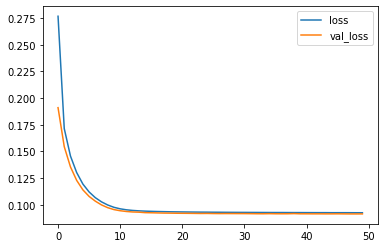

In [29]:
plt.plot(fit_hist.history['loss'], label='loss')
plt.plot(fit_hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [30]:
encoded_img = encoder.predict(x_test[:10].reshape(-1, 784))
decoded_img = decoder.predict(encoded_img)

<Figure size 432x288 with 0 Axes>

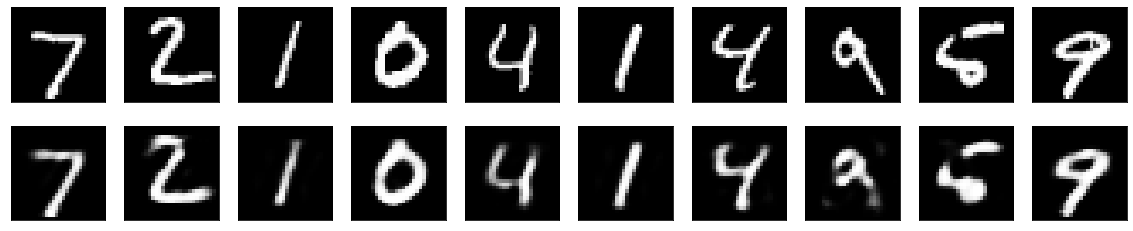

In [31]:
# 테스트 데이터로 결과 확인
n = 10
plt.gray()
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()  # 크기를 32로 줄였다가 다시 늘렸기 때문에 화질이 약간 안좋아짐

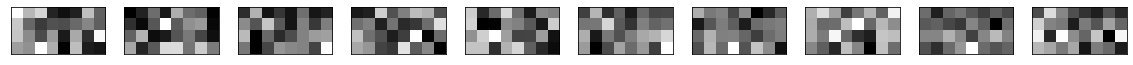

In [32]:
# 인코딩된 후 이미지
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(encoded_img[i].reshape(4, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## 모델 변경해 해상도 향상

In [33]:
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [34]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 784)               1011

In [35]:
# 만들어진 모델을 사용해 encoder만 따로 생성
encoder = Model(input_img, encoded)
encoder.summary()  # 출력 32

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 모델 학습
autoencoder.fit(flatted_x_train, flatted_x_train,
                epochs=100, batch_size=256,
                validation_data=(flatted_x_test, flatted_x_test)
                )

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.2545 - val_loss: 0.1718
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1522 - val_loss: 0.1361
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1301 - val_loss: 0.1228
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1206 - val_loss: 0.1159
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1153 - val_loss: 0.1115
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1115 - val_loss: 0.1086
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1085 - val_loss: 0.1058
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1059 - val_loss: 0.1042
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1037 - val_loss: 0.1018
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1020 - val_lo

In [37]:
# 결과 확인
decoded_img = autoencoder.predict(flatted_x_test)

<Figure size 432x288 with 0 Axes>

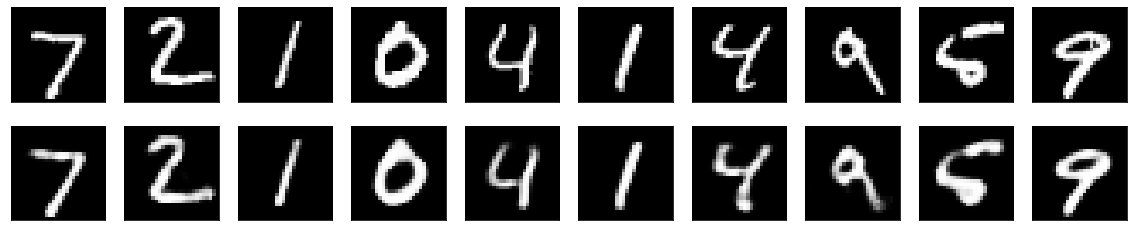

In [38]:
# 테스트 데이터로 결과 확인
n = 10
plt.gray()
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()  # 크기를 32로 줄였다가 다시 늘렸기 때문에 화질이 약간 안좋아짐

## CNN을 사용해 성능 향상

In [64]:
# 모델 생성
input_img = Input(shape=(28,28,1))
x = Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(input_img)
x = MaxPool2D(pool_size=(2,2), padding='same')(x)
x = Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(x)
encoded = MaxPool2D(pool_size=(2,2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)  # MaxPool과 반대되는 개념(각 값별로 크기 늘려줌)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 14, 14, 8)         0  

In [56]:
# 데이터 reshape
conv_x_train = np.reshape(x_train, (-1, 28, 28, 1))
conv_x_test = np.reshape(x_test, (-1, 28, 28, 1))

In [65]:
# 모델 학습
autoencoder.fit(conv_x_train, conv_x_train,
                epochs=50, batch_size=128,
                validation_data=(conv_x_test, conv_x_test),
                )

Epoch 1/50
469/469 [==============================] - 3s 5ms/step - loss: 0.1649 - val_loss: 0.0924
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0889 - val_loss: 0.0847
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0841 - val_loss: 0.0817
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0817 - val_loss: 0.0798
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0800 - val_loss: 0.0783
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0786 - val_loss: 0.0772
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0777 - val_loss: 0.0766
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0768 - val_loss: 0.0757
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0760 - val_loss: 0.0749
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0755 - val_loss: 0.0745

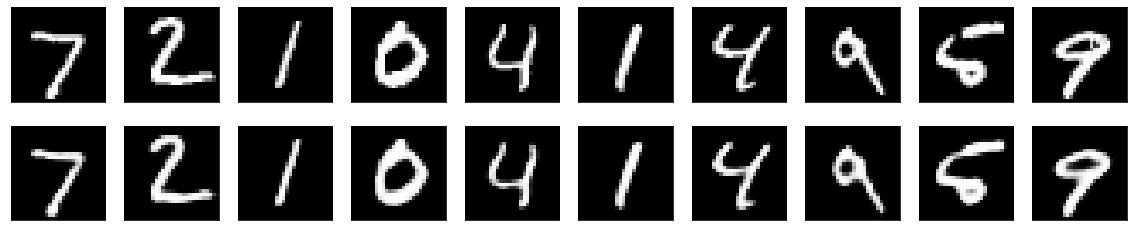

In [42]:
# 결과 확인
decoded_imgs = autoencoder.predict(conv_x_test)
n = 10
plt.figure(figsize=(20,4))
plt.gray()
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## 데이터에 잡음 추가

In [70]:
noise_factor = 1.0  # 잡음 크기 비율(반으로)
x_train_noisy = conv_x_train + noise_factor * np.random.normal(  # 정규분포를 따르는 noise 추가
    loc=0.0,  # 평균
    scale=1.0,  # 표준편차
    size=conv_x_train.shape
)
x_test_noisy = conv_x_test + noise_factor * np.random.normal(  # 정규분포를 따르는 noise 추가
    loc=0.0,  # 평균
    scale=1.0,  # 표준편차
    size=conv_x_test.shape
)
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

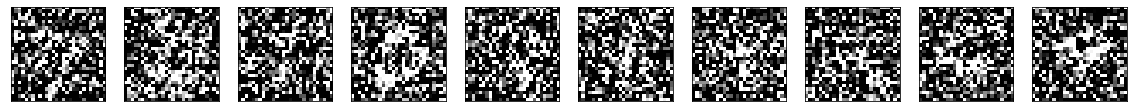

In [71]:
n = 10
plt.figure(figsize=(20, 2))
plt.gray()
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [72]:
# 모델 생성
input_img = Input(shape=(28,28,1))
x = Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(input_img)
x = MaxPool2D(pool_size=(2,2), padding='same')(x)
x = Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(x)
encoded = MaxPool2D(pool_size=(2,2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)  # MaxPool과 반대되는 개념(각 값별로 크기 늘려줌)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 14, 14, 8)         0  

In [73]:
# 모델 학습
fit_hist = autoencoder.fit(x_train_noisy, conv_x_train,
                           epochs=100, batch_size=128,
                           validation_data=(x_test_noisy, conv_x_test)
                           )

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2621 - val_loss: 0.2077
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2012 - val_loss: 0.1953
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1942 - val_loss: 0.1913
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1912 - val_loss: 0.1889
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1892 - val_loss: 0.1871
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1877 - val_loss: 0.1859
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1866 - val_loss: 0.1847
Epoch 8/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1856 - val_loss: 0.1841
Epoch 9/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1848 - val_loss: 0.1832
Epoch 10/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1841 - val_lo

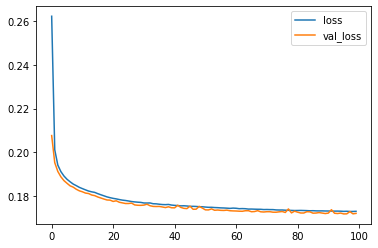

In [74]:
# 결과 확인
plt.plot(fit_hist.history['loss'], label='loss')
plt.plot(fit_hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

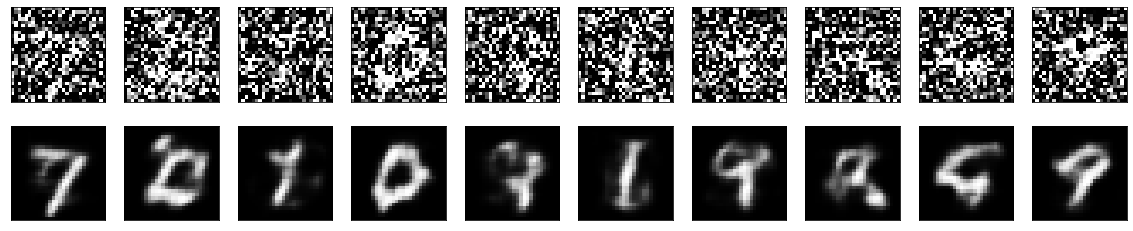

In [75]:
# 결과 확인
decoded_imgs = autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20,4))
plt.gray()
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()